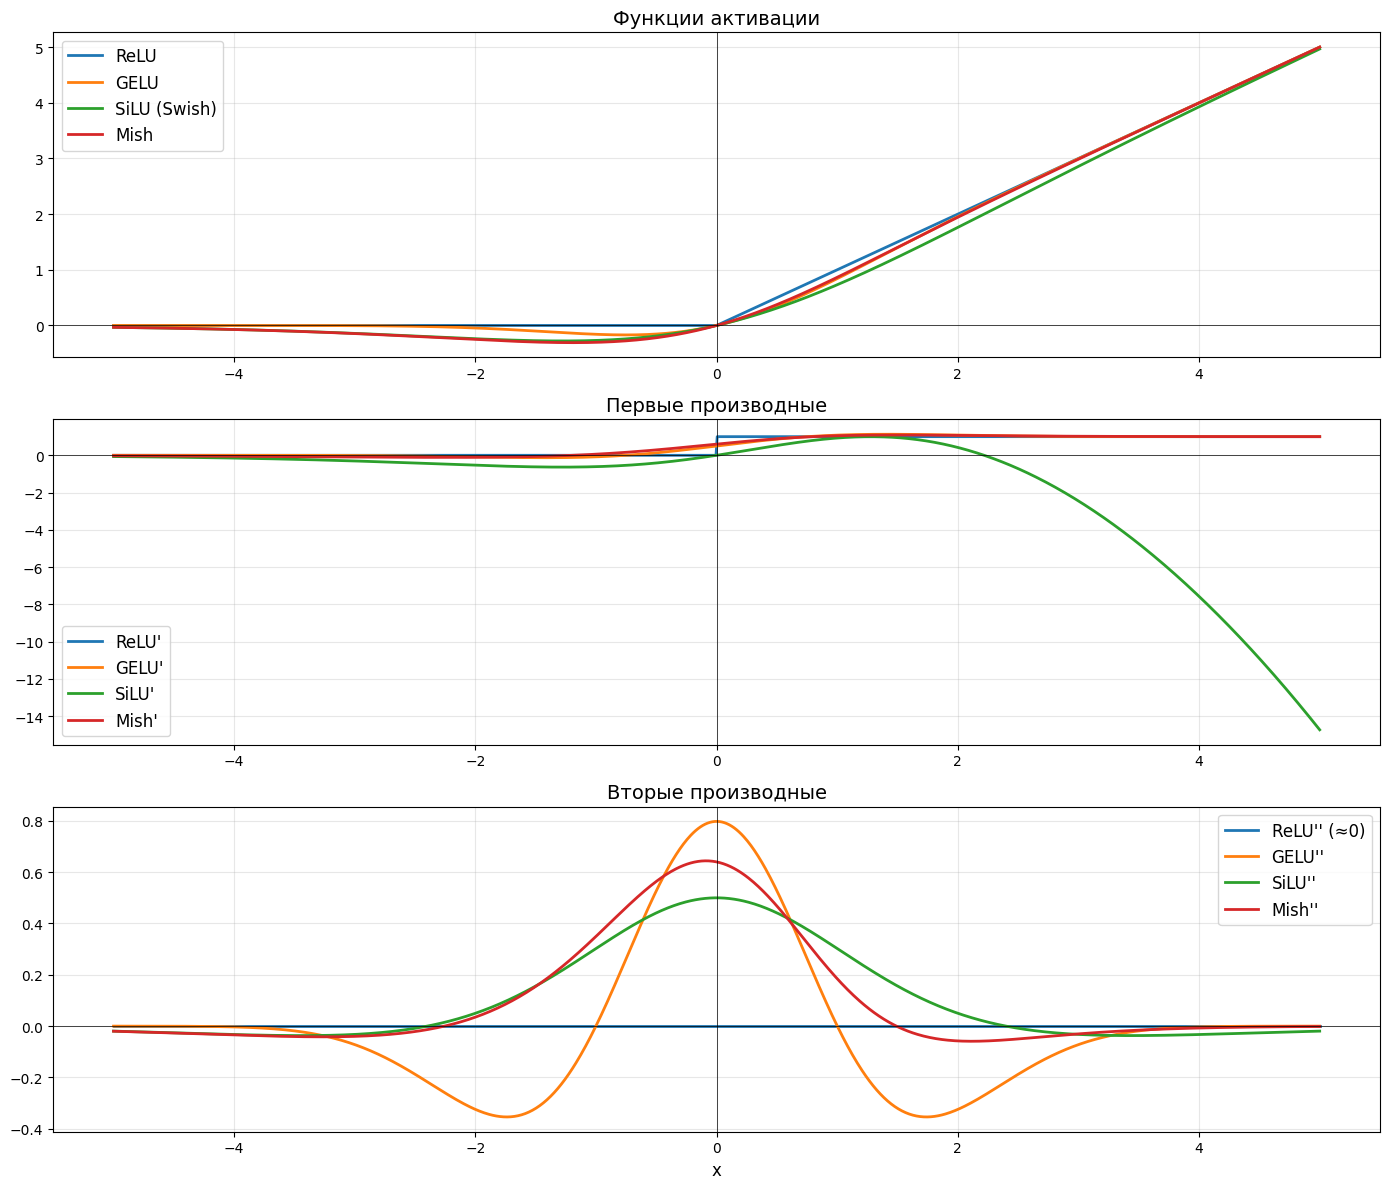

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)

# Functions
relu = np.maximum(0, x)
gelu = x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3))) / 2  # точнее с /2
silu = x / (1 + np.exp(-x))
mish = x * np.tanh(np.log1p(np.exp(x)))

relu_deriv = (x > 0).astype(float)

# gelu
phi = np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)
tanh_phi = np.tanh(phi)
gelu_deriv = 0.5 * (1 + tanh_phi) + 0.5 * x * (1 - tanh_phi**2) * np.sqrt(2 / np.pi) * (1 + 3 * 0.044715 * x**2)

# silu
silu_deriv = silu * (1 - silu) + silu

# mish
tanh_part = np.tanh(np.log1p(np.exp(x)))
delta = np.exp(x) / (1 + np.exp(x))
mish_deriv = tanh_part + x * (1 - tanh_part**2) * delta

# second derivatives
# rrelu
relu_second = np.zeros_like(x)

# silu
sigmoid = 1 / (1 + np.exp(-x))
dsigmoid = sigmoid * (1 - sigmoid)
silu_second = 2 * dsigmoid + x * dsigmoid * (1 - 2 * sigmoid)

# mish
t = tanh_part
mish_second = (1 - t**2) * (2 * delta + x * (-2 * t * delta**2 + delta * (1 - delta)))

# gelu
a = 0.044715
p = np.sqrt(2 / np.pi)
term = x + a * x**3
d_term = 1 + 3 * a * x**2
dd_term = 6 * a * x
phi = p * term
tanh_phi = np.tanh(phi)
sech2_phi = 1 - tanh_phi**2
dphi_dx = p * d_term
d2phi_dx2 = p * dd_term

gelu_second = (dphi_dx * sech2_phi + x * (-2 * tanh_phi * sech2_phi * dphi_dx**2 + sech2_phi * d2phi_dx2))


plt.figure(figsize=(14, 12))


plt.subplot(3, 1, 1)
plt.plot(x, relu, label='ReLU', linewidth=2)
plt.plot(x, gelu, label='GELU', linewidth=2)
plt.plot(x, silu, label='SiLU (Swish)', linewidth=2)
plt.plot(x, mish, label='Mish', linewidth=2)
plt.grid(True, alpha=0.3)
plt.title('Функции активации', fontsize=14)
plt.legend(fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


plt.subplot(3, 1, 2)
plt.plot(x, relu_deriv, label="ReLU'", linewidth=2)
plt.plot(x, gelu_deriv, label="GELU'", linewidth=2)
plt.plot(x, silu_deriv, label="SiLU'", linewidth=2)
plt.plot(x, mish_deriv, label="Mish'", linewidth=2)
plt.grid(True, alpha=0.3)
plt.title('Первые производные', fontsize=14)
plt.legend(fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)


plt.subplot(3, 1, 3)
plt.plot(x, relu_second, label="ReLU'' (≈0)", linewidth=2)
plt.plot(x, gelu_second, label="GELU''", linewidth=2)
plt.plot(x, silu_second, label="SiLU''", linewidth=2)
plt.plot(x, mish_second, label="Mish''", linewidth=2)
plt.grid(True, alpha=0.3)
plt.title('Вторые производные', fontsize=14)
plt.legend(fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('x', fontsize=12)

plt.tight_layout()
plt.show()

## Вычилсения mish
$$\text{Mish}(x) = x \cdot \tanh\left( \ln(1 + e^{x}) \right)$$
Альтернативно:
$$\text{Mish}(x) = x \cdot \tanh(\text{softplus}(x)), \quad \text{softplus}(x) = \ln(1 + e^{x})$$
Вспомогательные обозначения
$$\begin{aligned}
t &= \tanh(\text{softplus}(x)) = \tanh(\ln(1 + e^{x})) \\
\delta &= \frac{e^{x}}{1 + e^{x}}
\end{aligned}$$
Первая производная Mish'(x)
$$\text{Mish}'(x) = t + x (1 - t^{2}) \delta$$
В развёрнутом виде:
$$\begin{aligned}
\text{Mish}'(x) &= \tanh(\ln(1 + e^{x})) + x\cdot \left(1 - \tanh^{2}(\ln(1 + e^{x}))\right) \cdot \frac{e^{x}}{1 + e^{x}}
\end{aligned}$$
Вторая производная Mish''(x)
$$\text{Mish}''(x) = (1 - t^{2}) \left[ 2\delta + x \left( -2 t \delta^{2} + \delta (1 - \delta) \right) \right]$$
Упращаяя:
$$\text{Mish}''(x) = (1 - t^{2}) \left[ 2\delta + x \delta (1 - \delta - 2 t \delta) \right]$$